# Wikipedia Pageviews: Tracking Trends Over Time
This notebook explores some stylized facts about the Wikipedia Pageviews dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import collections
import random
import re
from dateutil import parser

pageviews = pd.read_csv('../input/wikipedia-pageviews/pageviews.csv')

## Most popular pages overall
Grimly, pages about people see their viewcounts spike when that person dies.

In [16]:
(
    pageviews
    .loc[~pageviews['article'].str.contains('United_States_Senate|404.php', na=False)]
    .sort_values('views', ascending=False).head(30)
)

,rank,article,views,date
170200,1,Chadwick_Boseman,9929065,2020/08/29
148600,1,Kobe_Bryant,9513452,2020/01/26
285800,1,Matthew_Perry,8784586,2023/10/29
244200,1,Elizabeth_II,8399082,2022/09/08
53700,1,Charles_Darwin,8145795,2017/06/21
148700,1,Kobe_Bryant,8045344,2020/01/27
80300,1,Stephen_Hawking,7126234,2018/03/14
162600,1,Sushant_Singh_Rajput,7062335,2020/06/14
1000,1,David_Bowie,6948182,2016/01/11
177300,1,Kamala_Harris,6591413,2020/11/08


## Tracking interest in Donald Trump
Views of Donald Trump's Wikipedia page seem to spike around elections, and are generally slower in other time periods.

<Axes: xlabel='date'>

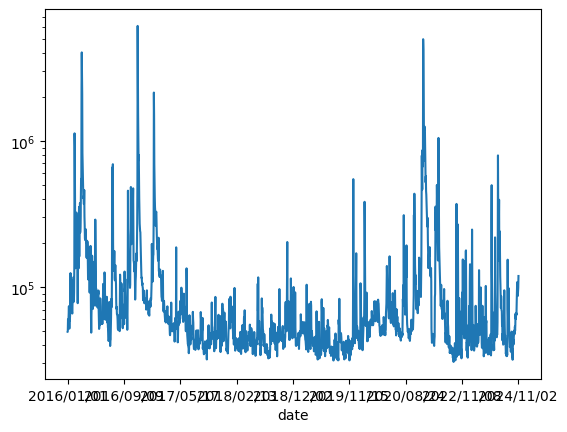

In [23]:
(
    pageviews
    .loc[pageviews['article'] == 'Donald_Trump']
    .set_index('date')
    ['views']
    .plot(logy=True)
)